In [1]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import numpy as np
#import plotly as py
#import plotly.plotly as py
from plotly import tools
import pandas as pd
import string, os, random
import calendar
import numpy as np
globalcolors =['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
init_notebook_mode(connected=True)
punc = string.punctuation
from functools import reduce
#import chart_studio.plotly as py
#import plotly.graph_objects as go

In [2]:
df1 = pd.read_csv('characteristics.csv', low_memory = False, encoding = 'latin-1')
df2 = pd.read_csv('vehicles.csv', low_memory = False)
df3 = pd.read_csv('places.csv', low_memory = False)
df4 = pd.read_csv('users.csv', low_memory = False)

accidents = reduce(lambda left, right: pd.merge(left, right, on = "Num_Acc"), [df1, df2, df3, df4])

In [3]:
#Revealing dataset Shape
#accidents.shape
print("Rows: ", accidents.shape[0], "Columns: ", accidents.shape[1])

Rows:  3553976 Columns:  52


# Renaming some columns

In [4]:
accids=accidents.copy()

accids.rename({'Num_Acc':'Accid_ID','an':'Year','mois':'Month','jour':'Day','hrmn':'Acc_Time_in_H:M','lum':'Light_Condi',
           'col':'Typ_of_collitn','atm':'Atmph_condi','com':'commune_No','adr':'Accid_Address','dep':'Dept',
           'num_veh_x':'Veh_No_x','catr':'Road_Cat', 'voie':'Rd_No', 'v1':'Route_Index','v2':'Alphnum_Rd_Index',
           'circ':'Traffic_Regime', 'nbv':'No_of_Trafic_Lanes','vosp':'Res_Lane','prof':'Long_profile',
           'surf':'Surface_Condi', 'infra':'Infrastructure', 'situ':'Sit_of_Accid','env1':'School_Point', 'catu':'User_Cat',
           'grav':'Accid_Severity', 'sexe':'User_Sex','secu':'Safty_Equip', 'locp':'Loc_of_Peds',
           'actp':'Act_of_Peds','an_nais':'User_YOB', 'num_veh_y':'Veh_No_y'},axis=1,inplace=True)


### Cleaning Dataset

In [5]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total NaN Values', 'Percentage of NaN Values'])

missing_data(accids)

,Total NaN Values,Percentage of NaN Values
Alphnum_Rd_Index,3394326,95.507848
Route_Index,2129664,59.923421
long,1970347,55.440639
lat,1970327,55.440076
gps,1953913,54.978227
pr1,1646623,46.331855
pr,1641293,46.181882
Accid_Address,663606,18.672214
Rd_No,220467,6.203390
place,104090,2.928832


In [6]:
accident = accids.drop(['Alphnum_Rd_Index', 'Route_Index', 'long', 'lat', 'pr1', 'pr', 'gps'], axis = 1)

# Question 1a. Is the number of Accidents per year decreasing ? (from 2005 to 2016)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go

# function to aggregate and return keys and values
def create_stack_bar_data(col, df):
    aggregated = df[col].value_counts().sort_index()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

x1, y1 = create_stack_bar_data('Year', accident)

for i in range(len(x1)):
    x1[i] += 2000

#x1 = x1[:-1]
#y1 = y1[:-1]
color1 = ['#1f77b4']*9
color2 = ['#ff7f0e']*3
color1.extend(color2)
trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name="year count", marker = dict(color = color1),text=y1)
layout = dict(height=400, title='NUMBER OF ACCIDENTS IN FRANCE FROM 2005-2016', legend=dict(orientation="h"), 
              xaxis = dict(title = 'Years'), yaxis = dict(title = 'Number of Accidents'))
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig)
plt.savefig("No_of_accidents_per_year.png", dpi=100)

<Figure size 432x288 with 0 Axes>

Fig.1: Shows that the number of accidents decreased on a steady rate from 2005 to 2013, and started tending to rise         from 2014 to 2016

Fig.1: Also shows that 2005 has the highest number of accidents according to this dataset

# Question 1b. Which months have higher frequency of accidents ?

In [8]:
x2, y2 = create_stack_bar_data('Month', accident)

gn = [calendar.month_name[int(x)] for x in (x2)]
hn = y2

trace1 = go.Bar(x=gn, y=hn, opacity=0.75, name="month", marker=dict(color=globalcolors[4]),text=hn)
layout = dict(height=400, title='MONTHLY DISPLAY OF THE NUMBER OF ACCIDENTS IN FRANCE FROM 2005-2016', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')
plt.savefig("Month_with_higher_accident_frequency.png", dpi=100)

<Figure size 432x288 with 0 Axes>

       Fig 2: Shows that October has the highest frequency of accidents

# Question 1c. Which Day-of-the-Month is Most safe to Drive?

In [9]:
aa, bb = create_stack_bar_data('Day', accident)
trace1 = go.Bar(x=aa, y=bb, opacity=0.75, name="monthday", marker=dict(color=globalcolors[4]))
layout = dict(height=400, title='DAILY RECORD OF ACCIDENT(S)', legend=dict(orientation="h") );

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')
plt.savefig("Most_Safe_Day_of_month_to_drive.png", dpi=100)

<Figure size 432x288 with 0 Axes>

      Fig.3: Reveals that 31st of each month is most safe to drive

# Question 1d. Time series of all accidents from 2005 to 2016

In [10]:
# Plotting the time series of all accidents from 2005 to 2016
accident.Year += 2000
dates = pd.to_datetime(accident.Year*10000+accident.Month*100+accident.Day,format='%Y%m%d')
accident.Year -= 2000
aggregated = dates.value_counts().sort_index()
x_values = aggregated.index.tolist()
y_values = aggregated.values.tolist()
x1,y1 = x_values, y_values

#x1, y1 = create_stack_bar_data('Day', accident)
trace1 = go.Scatter(x=x1, y=y1, opacity=0.75, name="monthday", marker=dict(color='#1f77b4'), line = dict(
        width = 0.6))
layout = dict(height=400, title='TIME SERIES OF ACCIDENTS FROM 2005 TO 2016', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')
plt.savefig("Time_series_of_accidents_from_2005_to_2016.png", dpi=100)

<Figure size 432x288 with 0 Axes>

# Question 1e. Time series for all accidents in each year

In [11]:
# Plotting the time series of accidents for each year
accident.Year += 2000
dates = pd.to_datetime(accident.Year*10000+accident.Month*100+accident.Day,format='%Y%m%d')
accident.Year -= 2000
traces = []
for key, grp in dates.groupby(dates.dt.year):
    #print(grp)
    aggregated = grp.dt.month.value_counts().sort_index()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    x1,y1 = x_values, y_values
    x1 = [calendar.month_name[int(x)] for x in (x1)]


    

#x1, y1 = create_stack_bar_data('jour', accidents)
    trace1 = go.Scatter(x=x1, y=y1, opacity=0.75, line = dict(
        width = 1.5), name = str(key), marker = dict(color = np.random.randn(500)*key), mode = 'lines', 
                       text = str(key))
    layout = dict(height=400, title='TIME SERIES OF ACCIDENTS FOR EACH YEAR', legend=dict(orientation="h"));
    traces.append(trace1)
fig = go.Figure(data= traces, layout=layout)
iplot(fig, filename='stacked-bar')
plt.savefig("Time_series_for_all_accidents_in_each_year.png", dpi=100)

<Figure size 432x288 with 0 Axes>

### Comments: 
                 There is an observed sharp rise in the months of June, July, September and October.
                 There also are Sharp drops observed in February and August.
                 December, 2006 has the highest number of accidents at 36,648.
                 February, 2013 has the lowest number of accidents at 15,605.

In [12]:
# Question 2a: Which types of roads are high-risk ?

In [13]:
x1, y1 = create_stack_bar_data('Road_Cat', accident)
x1 = ['Highway', 'National Road', 'Departmental Road', 'Communal Way', 'Off-Public Network', 'Parking Lot', 'Other']
trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name="Category", marker=dict(color='#2ca02c'))

x2, y2 = create_stack_bar_data('Traffic_Regime', accident)
x2 = ['Unknown','One Way', 'Bidirectional', 'Separated Carriageways', 'Variable Assignment Channels']
trace2 = go.Bar(x = x2, y = y2, opacity = 0.75, marker=dict(color='#bcbd22'), name = "Traffic Flow")

x3, y3 = create_stack_bar_data('Long_profile', accident)
x3 = ['Unknown', 'Dish','Slope', 'Hill-Top', 'Hill-Bottom']
trace3 = go.Bar(x = x3, y = y3, opacity = 0.75, marker=dict(color='#d62728'), name = "Road Gradient")


fig = tools.make_subplots(rows = 3, cols = 1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
layout = dict(height=900, title='ACCIDENTS BASED ON ROAD TYPE/CATEGORY');
fig.layout.update(layout)
#fig['layout'].update(height=800,title='Accidents by Type of Road')
iplot(fig, filename='stacked-bar')
plt.savefig("high_risk_roads.png", dpi=100)

C:\Users\User\anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<Figure size 432x288 with 0 Axes>

    #### Answer: Communal Ways, Departmental Roads, and Bidirectional ways, are roads with higher-risks

# Question 2b. Which type of road gradient is high risk?

In [14]:
keydict = {1:'Highway', 2:'National Road', 3:'Departmental Road', 4:'Communal Way', 5:'Off-Public Network', 6:'Parking Lot', 9:'Other'}
roadtype = accident[['Road_Cat','Traffic_Regime']]
traces = []
for key, grp in roadtype.groupby(roadtype.Road_Cat):
    aggregated = grp.Traffic_Regime.value_counts().sort_index()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    x1,y1 = x_values, y_values
    x1 = ['Unknown','One Way', 'Bidirectional', 'Separated Carriageways', 'Variable Assignment Channels']


    

#x1, y1 = create_stack_bar_data('jour', accidents)
    trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name = keydict[key], 
                        marker = dict(color = globalcolors[int(key)-1]))
    layout = dict(height=800, title='ACCIDENT DISTRIBUTION BASED ON ROAD TYPE', legend=dict(orientation="h"));
    traces.append(trace1)
fig = go.Figure(data= traces, layout=layout)
iplot(fig)
plt.savefig("road_gradient_that_is_high_risk.png", dpi=100)

<Figure size 432x288 with 0 Axes>

# Question 3a: What was the condition of people involved in the accidents ?

In [15]:
keydict = {1:'Driver', 2:'Passenger', 3:'Pedestrian', 4:'Pedestrian in Motion'}
people = accident[['User_Cat','Accid_Severity']]
traces = []
for key, grp in people.groupby(people.User_Cat):
    aggregated = grp.Accid_Severity.value_counts().sort_index()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    x1,y1 = x_values, y_values
    x1 = ['Unscathed','Killed', 'Hospitalized', 'Light Injury']


    

#x1, y1 = create_stack_bar_data('jour', accidents)
    trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name = keydict[key],  
                        marker = dict(color = globalcolors[key-5]))
    layout = dict(height=400, title='CONDITION OF PEOPLE INVOLVED IN ACCIDENTS', legend=dict(orientation="h"));
    traces.append(trace1)
fig = go.Figure(data= traces, layout=layout)
iplot(fig)
plt.savefig("accident_victims_condition.png", dpi=100)

<Figure size 432x288 with 0 Axes>

In [16]:
# Question 3c: What was the sex distribution of the people involved?

In [17]:
keydict = {1:'Male', 2:'Female'}
people = accident[['User_Cat','User_Sex']]
traces = []
for key, grp in people.groupby(people.User_Sex):
    aggregated = grp.User_Cat.value_counts().sort_index()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    x1,y1 = x_values, y_values
    x1 = ['Driver','Passenger', 'Pedestrian', 'Pedestrian in Motion']


    

#x1, y1 = create_stack_bar_data('jour', accidents)
    trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name = keydict[key],  
                        marker = dict(color = globalcolors[key-5]))
    layout = dict(height=400, title='DISTRIBUTION OF PEOPLE INVOLVED IN ACCIDENTS BY GENDER', legend=dict(orientation="h"));
    traces.append(trace1)
fig = go.Figure(data= traces, layout=layout)
iplot(fig)
plt.savefig("victims_sex_distribution.png", dpi=100)

<Figure size 432x288 with 0 Axes>

In [18]:
# Question 4a: What was the distribution of Safety Equipment used?

In [19]:
safety = accident[['Safty_Equip', 'Accid_Severity']]
safety = safety.dropna()
safety['equipment'] = (safety.Safty_Equip/10).astype(int)
safety.Safty_Equip = (safety.Safty_Equip - safety.equipment*10).astype(int)


x1, y1 = create_stack_bar_data('equipment', safety)
x1 = ['Belt', 'Helmet', "Children's Device", 'Reflective Equipment', "Other"]
trace1 = go.Bar(x=x1, y=y1, opacity=0.75, marker=dict(color='#e377c2'))
layout = dict(height=400, title='DISTRIBUTION OF SAFETY EQUIPMENTS', legend=dict(orientation="h") );

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')
plt.savefig("safety_equipment_distribution.png", dpi=100)

<Figure size 432x288 with 0 Axes>

# Question 4b: Did the use of Safety Equipments impact condition of people after the accident?

In [21]:
keydict = {1:'Unscathed', 2:'Killed', 3: 'Hospitalized', 4: 'Light Injury'}
traces = []
for key, grp in safety.groupby(safety.Accid_Severity):
    if (key != 0):
        count = safety.Safty_Equip.count()
        #print(count)
        aggregated = (grp.Safty_Equip.value_counts()).sort_index()
        x_values = aggregated.index.tolist()
        y_values = (aggregated.values/safety.Safty_Equip.value_counts().sort_index().values*100).tolist()
        x1,y1 = x_values[1:], y_values[1:]
        x1 = ['Equipment Present','Equipment Absent', 'Not Determined']


    

#x1, y1 = create_stack_bar_data('jour', accidents)
        trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name = keydict[key],  
                        marker = dict(color = globalcolors[key-2]))
        layout = dict(height=600, title='THE IMPLICATION OF SAFETY EQUIPTMENT USAGE IN TERMS OF SEVERITY OF ACCIDENT', 
                      legend=dict(orientation="h"), barmode = 'stack', yaxis = dict(title = 'Percentage'),
                      xaxis = dict(title = 'Safety Equipment'));
        traces.append(trace1)
fig = go.Figure(data= traces, layout=layout)
iplot(fig)
plt.savefig("Impact_of_safety_equipment.png", dpi=100)

<Figure size 432x288 with 0 Axes>

# Question 3b. What was the age distribution of the people involved?

In [22]:
accident.head()

,Accid_ID,Year,Month,Day,Acc_Time_in_H:M,Light_Condi,agg,int,Atmph_condi,Typ_of_collitn,...,User_Cat,Accid_Severity,User_Sex,trajet,Safty_Equip,Loc_of_Peds,Act_of_Peds,etatp,User_YOB,Veh_No_y
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
3,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
4,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01


<ipython-input-25-e8f5fee3b1ee>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



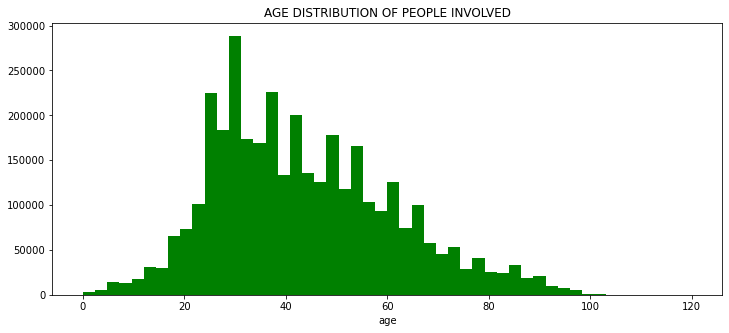

In [25]:
ageusers = accident[['User_YOB', 'User_Cat']]
ageusers['age'] = 2016 - ageusers.User_YOB

sns.set_style='White'
plt.figure(figsize=(12,5))
plt.title("AGE DISTRIBUTION OF PEOPLE INVOLVED")
sns.distplot(ageusers['age'],color='g',kde=False,hist_kws={'alpha':1})
plt.savefig("Victims_age_distribution.png", dpi=100)